In [1]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from scipy.optimize import curve_fit as cf
import scipy.stats as sct

In [2]:
names1 = ['apo', 'bound', 'allo-apo', 'allo-bound', 'allo-both']
names2 = ['g2489a', 'g249v', 'g249w', 'og249w']

In [3]:
def get_hist(d1, d2, b1, b2):
    h = np.histogram2d(d1, d2, bins=[b1,b2], density=False)[0].T/d1.shape[0]
    h[np.where(h==0)] = -np.inf
    return h

In [4]:
def get_linear(x,y,xv):
    lr = sct.linregress(x,y)
    return xv*lr[0]+lr[1]

In [5]:
def get_colors(d1, d2, b1, b2, cmap='jet'):
    h = np.histogram2d(d1, d2, bins=[b1,b2], density=False)[0]
    h = h/h.max()
    b1 = np.digitize(d1, b1) - 2
    b2 = np.digitize(d2, b2) - 2
    return h[b1,b2]

In [6]:
xmin, xmax = 2.4, 3.4
ymin, ymax = [0.6, 1.5],  [2.6,3.3]

In [7]:
bin1 = np.arange(2,4,0.01)
xb1 = bin1[1:] - (bin1[1]-bin1[0])/2

In [8]:
bin2 = np.arange(0.6,2.6,0.01), np.arange(1.4,3.4,0.03)
xb2 = bin2[0][1:] - (bin2[0][1]-bin2[0][0])/2, bin2[1][1:] - (bin2[1][1]-bin2[1][0])/2

In [9]:
wt_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_4jx1_{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in names1]

In [10]:
wt_ch1=[np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_4jx1_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in 
     names1], [np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_4jx1_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in names1]

In [11]:
hwt = [
    get_hist(wt_i[a], wt_ch1[0][a], bin1, bin2[0])
for a,_ in enumerate(wt_i)], [
    get_hist(wt_i[a], wt_ch1[1][a], bin1, bin2[1])
for a,_ in enumerate(wt_i)]

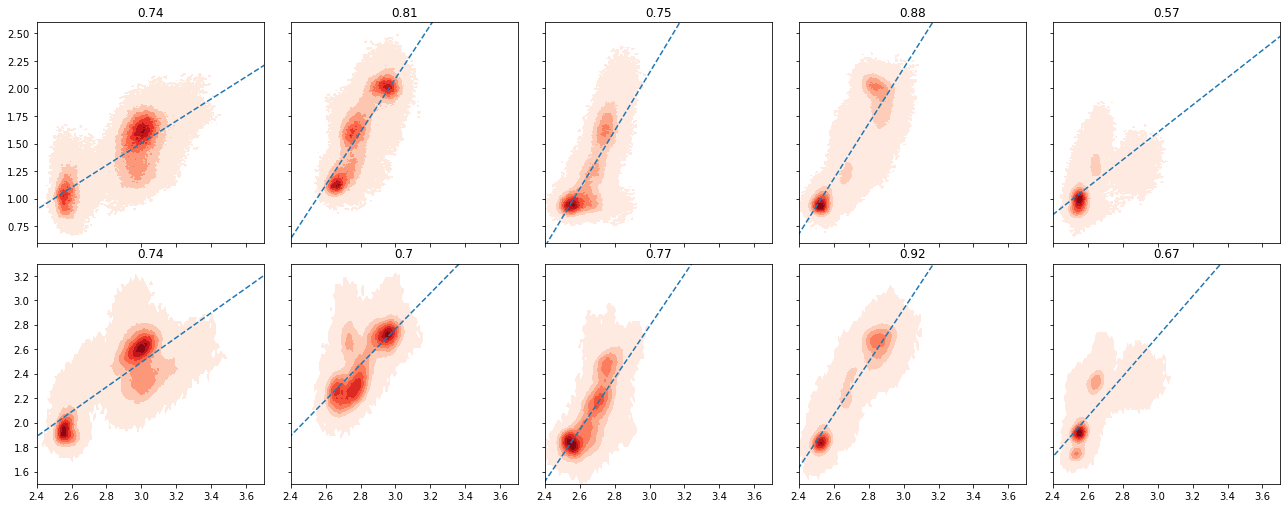

In [33]:
fig,ax=plt.subplots(2,len(hwt[0]), figsize=(18/5*len(hwt[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hwt):
    for b,h in enumerate(hh):
        ax[a,b].contourf(xb1, xb2[a], h, cmap='Reds')
        ax[a,b].plot(xb1, get_linear(wt_i[b], wt_ch1[a][b], xb1), '--')
        ax[a,b].set_title(np.round(np.corrcoef(wt_i[b], wt_ch1[a][b])[0][1], 2))
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

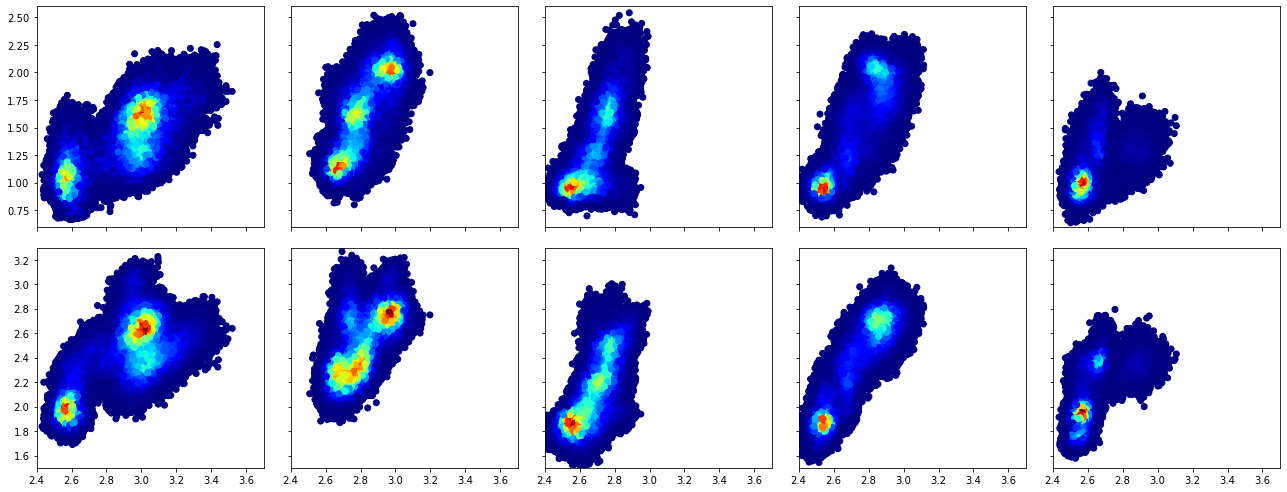

In [34]:
fig,ax=plt.subplots(2,len(hwt[0]), figsize=(18/5*len(hwt[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hwt):
    for b,h in enumerate(hh):
        ax[a,b].scatter(wt_i[b], wt_ch1[a][b], 
                        c=get_colors(wt_i[b], wt_ch1[a][b], bin1, bin2[a]), cmap='jet')
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

In [12]:
closed_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_{n}_apo.xvg',
                    comments=['@','#'])[:,1]
         for n in names2]

In [13]:
closed_ch1=[np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_{n}_apo.xvg',
    comments=['@','#'])[:,1]
    for n in 
     names2], [np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_{n}_apo.xvg',
    comments=['@','#'])[:,1]
    for n in names2]

In [14]:
hclosed = [
    get_hist(closed_i[a], closed_ch1[0][a], bin1, bin2[0])
for a,_ in enumerate(closed_i)], [
    get_hist(closed_i[a], closed_ch1[1][a], bin1, bin2[1])
for a,_ in enumerate(closed_i)]

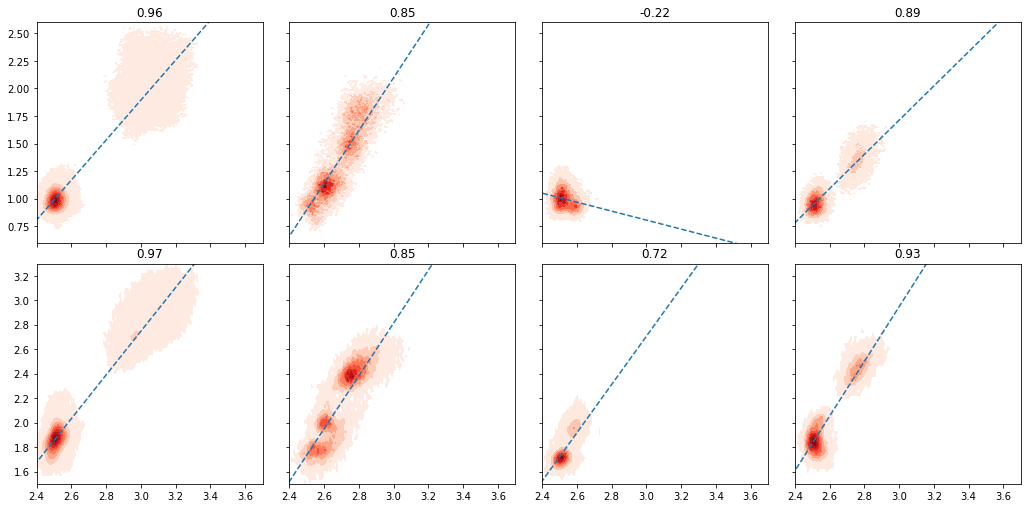

In [42]:
fig,ax=plt.subplots(2,len(hclosed[0]), figsize=(18/5*len(hclosed[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hclosed):
    for b,h in enumerate(hh):
        ax[a,b].contourf(xb1, xb2[a], h, cmap='Reds')
        ax[a,b].plot(xb1, get_linear(closed_i[b], closed_ch1[a][b], xb1), '--')
        ax[a,b].set_title(np.round(np.corrcoef(closed_i[b], closed_ch1[a][b])[0][1], 2))
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

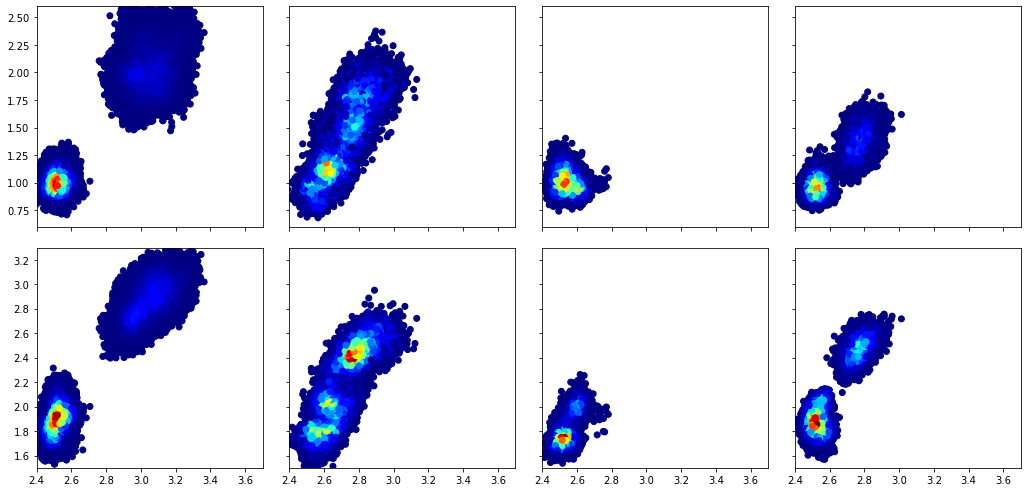

In [43]:
fig,ax=plt.subplots(2,len(hclosed[0]), figsize=(18/5*len(hclosed[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hclosed):
    for b,h in enumerate(hh):
        ax[a,b].scatter(closed_i[b], closed_ch1[a][b], 
                        c=get_colors(closed_i[b], closed_ch1[a][b], bin1, bin2[a]), cmap='jet')
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

In [15]:
opened_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_l166a_{n}.xvg',
                    comments=['@','#'])[:,1]
         for n in names1[:2]]

In [16]:
opened_ch1=[np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_l166a_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in names1[:2]], [np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_l166a_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in names1[:2]]

In [17]:
hopened = [
    get_hist(opened_i[a], opened_ch1[0][a], bin1, bin2[0])
for a,_ in enumerate(opened_i)], [
    get_hist(opened_i[a], opened_ch1[1][a], bin1, bin2[1])
for a,_ in enumerate(opened_i)]

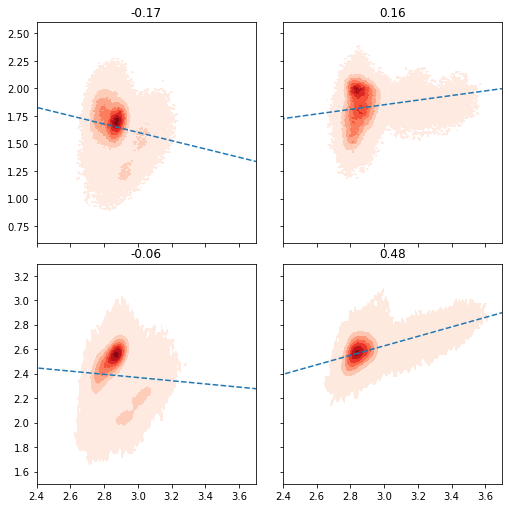

In [47]:
fig,ax=plt.subplots(2,len(hopened[0]), figsize=(18/5*len(hopened[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hopened):
    for b,h in enumerate(hh):
        ax[a,b].contourf(xb1, xb2[a], h, cmap='Reds')
        ax[a,b].plot(xb1, get_linear(opened_i[b], opened_ch1[a][b], xb1), '--')
        ax[a,b].set_title(np.round(np.corrcoef(opened_i[b], opened_ch1[a][b])[0][1], 2))
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

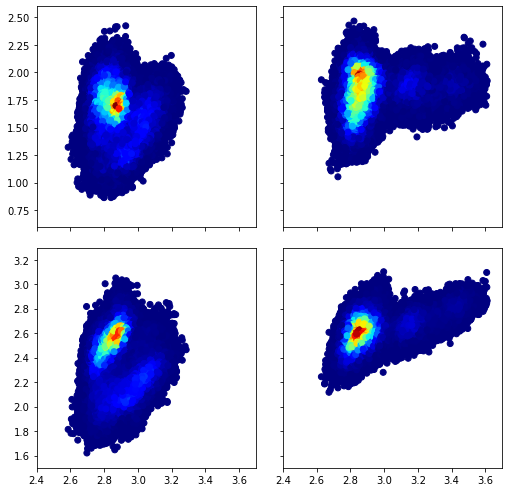

In [48]:
fig,ax=plt.subplots(2,len(hopened[0]), figsize=(18/5*len(hopened[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hopened):
    for b,h in enumerate(hh):
        ax[a,b].scatter(opened_i[b], opened_ch1[a][b], 
                        c=get_colors(opened_i[b], opened_ch1[a][b], bin1, bin2[a]), cmap='jet')
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

In [18]:
decoupled_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_f163a_{n}.xvg',
                    comments=['@','#'])[:,1]
            for n in names1]

In [19]:
decoupled_ch1=[np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450_f163a_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in names1], [np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450_f163a_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in names1]

In [20]:
hdecoupled = [
    get_hist(decoupled_i[a], decoupled_ch1[0][a], bin1, bin2[0])
for a,_ in enumerate(decoupled_i)], [
    get_hist(decoupled_i[a], decoupled_ch1[1][a], bin1, bin2[1])
for a,_ in enumerate(decoupled_i)]

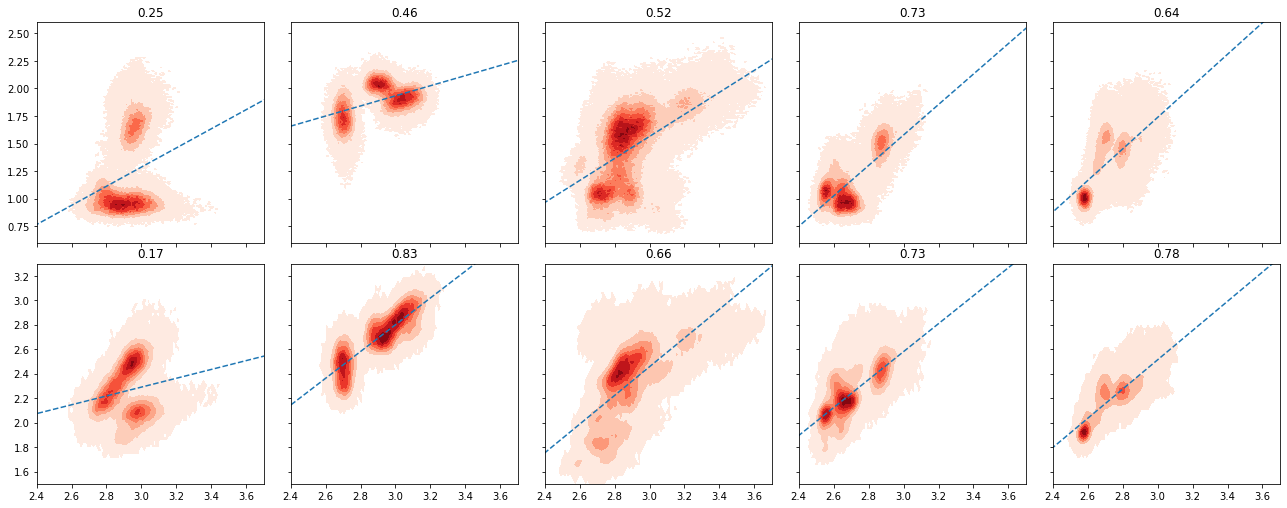

In [53]:
fig,ax=plt.subplots(2,len(hdecoupled[0]), figsize=(18/5*len(hdecoupled[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hdecoupled):
    for b,h in enumerate(hh):
        ax[a,b].contourf(xb1, xb2[a], h, cmap='Reds')
        ax[a,b].plot(xb1, get_linear(decoupled_i[b], decoupled_ch1[a][b], xb1), '--')
        ax[a,b].set_title(np.round(np.corrcoef(decoupled_i[b], decoupled_ch1[a][b])[0][1], 2))
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

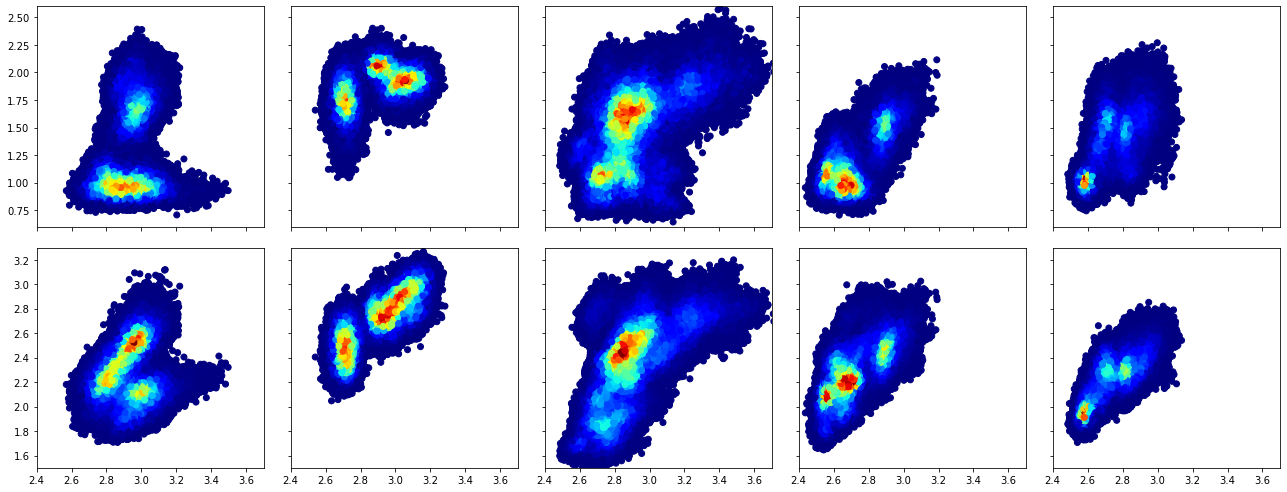

In [54]:
fig,ax=plt.subplots(2,len(hdecoupled[0]), figsize=(18/5*len(hdecoupled[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hdecoupled):
    for b,h in enumerate(hh):
        ax[a,b].scatter(decoupled_i[b], decoupled_ch1[a][b], 
                        c=get_colors(decoupled_i[b], decoupled_ch1[a][b], bin1, bin2[a]), cmap='jet')
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

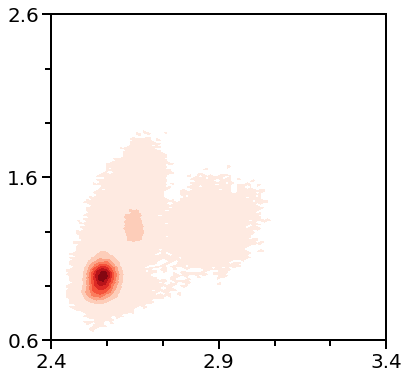

In [40]:
pl=0
curve = hwt[pl][4]
oname=f'wt_ch1-{pl}_3s'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([0.6,1.6,2.6])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

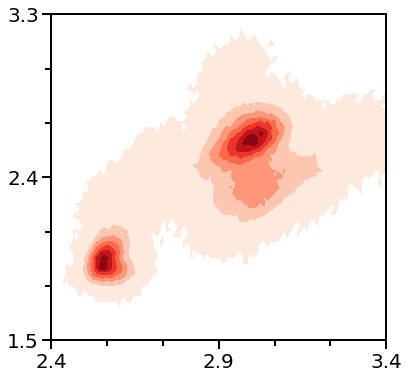

In [50]:
pl=1
curve = hwt[pl][0]
oname=f'wt_ch1-{pl}_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

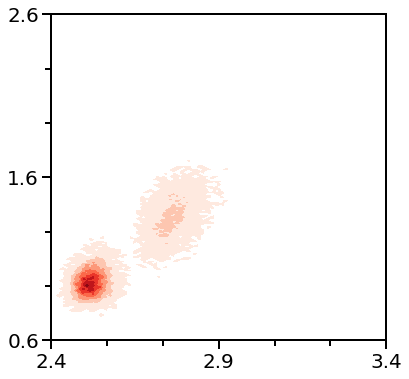

In [54]:
pl=0
curve = hclosed[pl][3]
oname=f'og249w_ch1-{pl}_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([0.6,1.6,2.6])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

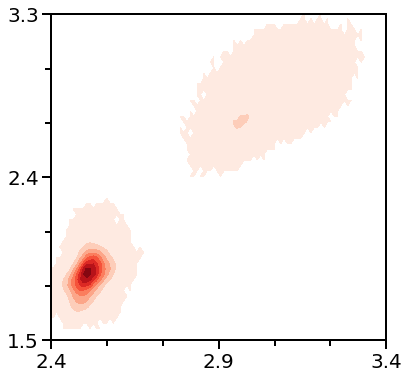

In [59]:
pl=1
curve = hclosed[pl][0]
oname=f'g2489a_ch1-{pl}_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

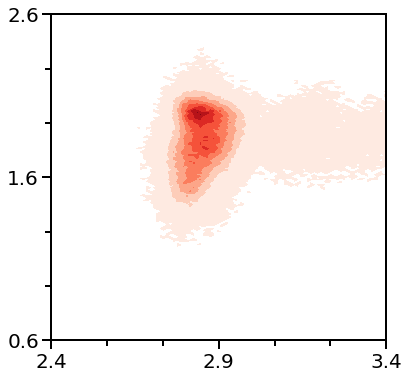

In [61]:
pl=0
curve = hopened[pl][1]
oname=f'l166a_ch1-{pl}_cata'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([0.6,1.6,2.6])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

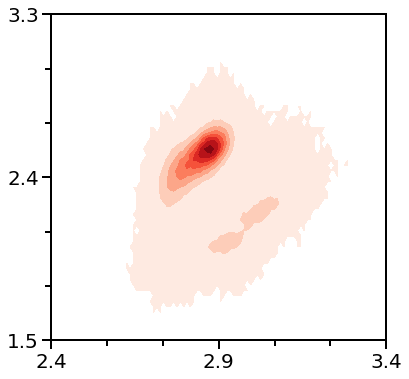

In [63]:
pl=1
curve = hopened[pl][0]
oname=f'l166a_ch1-{pl}_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

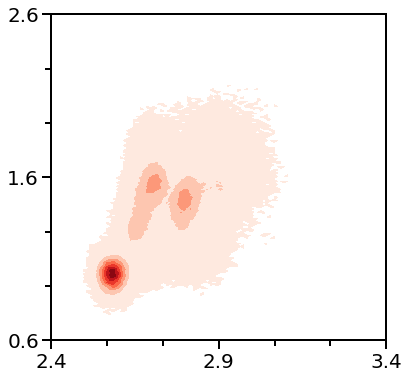

In [68]:
pl=0
curve = hdecoupled[pl][4]
oname=f'f163a_ch1-{pl}_3s'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([0.6,1.6,2.6])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

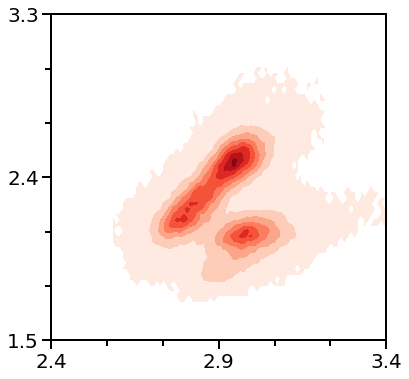

In [73]:
pl=1
curve = hdecoupled[pl][0]
oname=f'f163a_ch1-{pl}_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

### prev

### pdx

In [9]:
pdx_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450-pdx_{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in names1]

In [10]:
pdx_ch1=[np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_p450-pdx_4jx1_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in 
     names1], [np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_p450-pdx_4jx1_{n}.xvg',
    comments=['@','#'])[:,1]
    for n in names1]

In [11]:
hpdx = [
    get_hist(pdx_i[a], pdx_ch1[0][a], bin1, bin2[0])
for a,_ in enumerate(pdx_i)], [
    get_hist(pdx_i[a], pdx_ch1[1][a], bin1, bin2[1])
for a,_ in enumerate(pdx_i)]

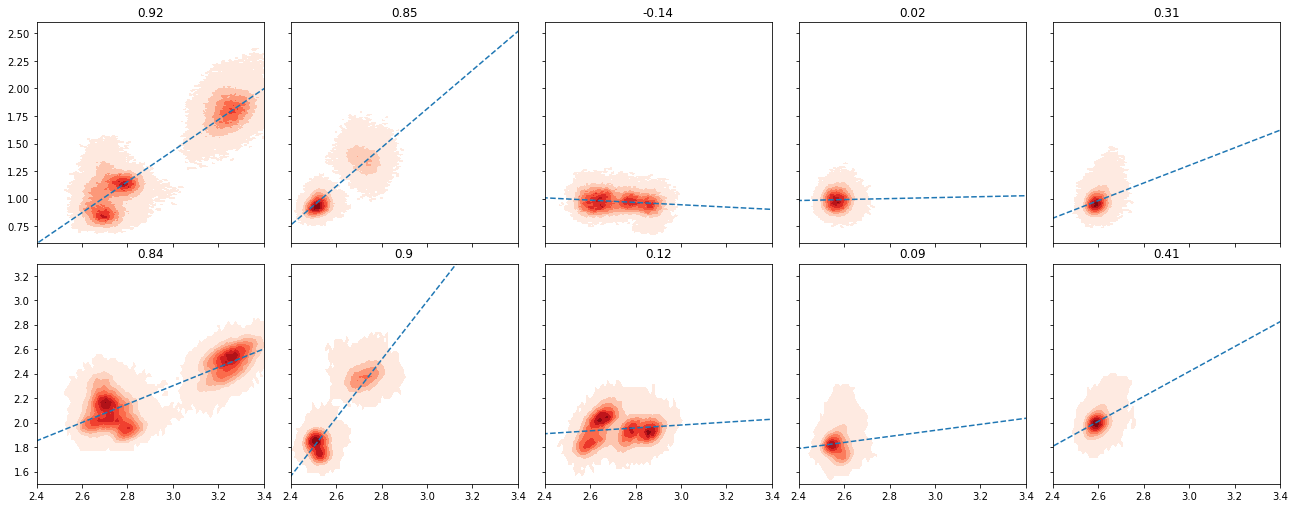

In [13]:
fig,ax=plt.subplots(2,len(hpdx[0]), figsize=(18/5*len(hpdx[0]),7), sharex=True, sharey='row')
plt.tight_layout()
for a,hh in enumerate(hpdx):
    for b,h in enumerate(hh):
        ax[a,b].contourf(xb1, xb2[a], h, cmap='Reds')
        ax[a,b].plot(xb1, get_linear(pdx_i[b], pdx_ch1[a][b], xb1), '--')
        ax[a,b].set_title(np.round(np.corrcoef(pdx_i[b], pdx_ch1[a][b])[0][1], 2))
    ax[a,0].set_ylim(ymin[a], ymax[a])
ax[0,0].set_xlim(xmin, xmax)
plt.show()

### jacs-2018

In [12]:
nv_i = np.concatenate(([np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_navjeet{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in [1,2,3]]))

In [13]:
nv_ch1=np.concatenate(([np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_navjeet{n}.xvg',
    comments=['@','#'])[:,1]
    for n in [1,2,3]])), np.concatenate(([np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_navjeet{n}.xvg',
    comments=['@','#'])[:,1]
    for n in [1,2,3]]))

In [14]:
hnv = get_hist(nv_i, nv_ch1[0], bin1, bin2[0]), get_hist(nv_i, nv_ch1[1], bin1, bin2[1])

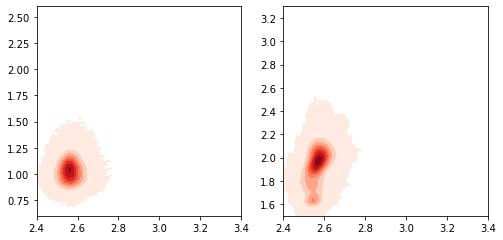

In [31]:
fig,ax=plt.subplots(1,2, figsize=(3.5*2,3.5))
plt.tight_layout()
for a in range(2): 
    ax[a].contourf(xb1, xb2[a], hnv[a], cmap='Reds')
    ax[a].set_xlim(xmin,xmax)
    ax[a].set_ylim(ymin[a],ymax[a])
plt.show()

### bpj-2021

In [15]:
bp_i = np.concatenate(([np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_bhuppi_{n}.xvg',
                comments=['@','#'])[:,1][35001:] 
     for n in range(11,21)]))

In [16]:
bp_ch1=np.concatenate(([np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_91CA_192CA_bhuppi_{n}.xvg',
    comments=['@','#'])[:,1][35001:]
    for n in range(11,21)])), np.concatenate(([np.loadtxt(
    f'../2_channel_1_opening_closing_transitions/1_91-192_185-318_ca_dist/dist_185CA_318CA_bhuppi_{n}.xvg',
    comments=['@','#'])[:,1][35001:]
    for n in range(11,21)]))

In [17]:
hbp = get_hist(bp_i, bp_ch1[0], bin1, bin2[0]), get_hist(bp_i, bp_ch1[1], bin1, bin2[1])

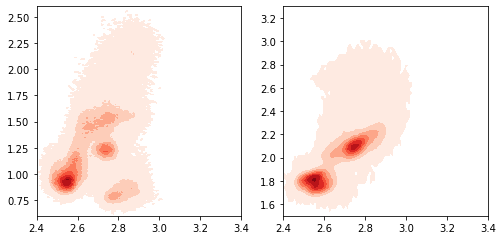

In [41]:
fig,ax=plt.subplots(1,2, figsize=(3.5*2,3.5))
plt.tight_layout()
for a in range(2): 
    ax[a].contourf(xb1, xb2[a], hbp[a], cmap='Reds')
    ax[a].set_xlim(xmin,xmax)
    ax[a].set_ylim(ymin[a],ymax[a])
plt.show()

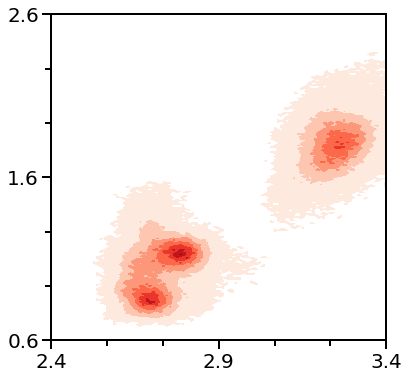

In [23]:
pl=0
curve = hpdx[pl][0]
oname=f'pdx_ch1-{pl}_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([0.6,1.6,2.6])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_prev/{oname}.pdf', transparent=True)
plt.show()

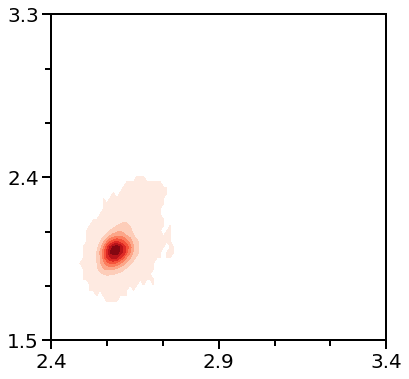

In [37]:
pl=1
curve = hpdx[pl][4]
oname=f'pdx_ch1-{pl}_3s'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_prev/{oname}.pdf', transparent=True)
plt.show()

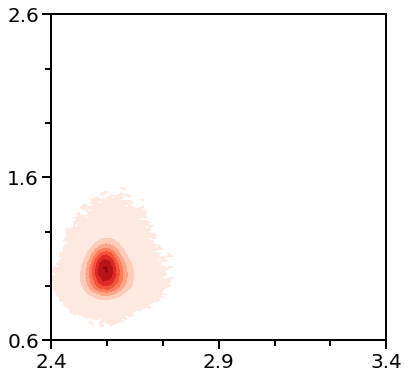

In [24]:
pl=0
curve = hnv[pl]
oname=f'nv_ch1-{pl}'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([0.6,1.6,2.6])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_prev/{oname}.pdf', transparent=True)
plt.show()

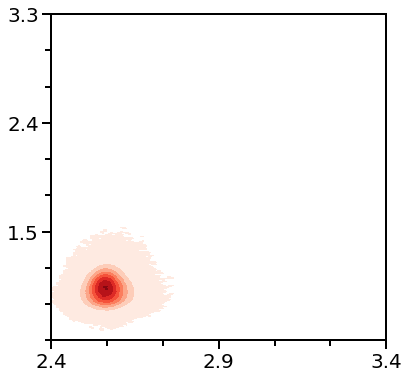

In [41]:
pl=1
curve = hnv[pl]
oname=f'nv_ch1-{pl}'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_prev/{oname}.pdf', transparent=True)
plt.show()

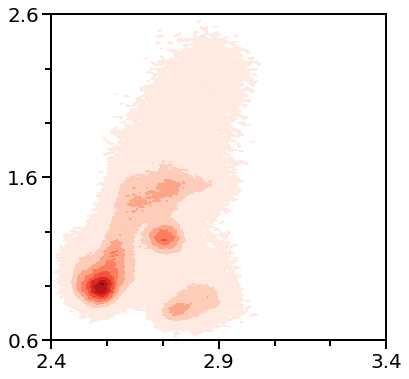

In [25]:
pl=0
curve = hbp[pl]
oname=f'bp_ch1-{pl}'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([0.6,1.6,2.6])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_prev/{oname}.pdf', transparent=True)
plt.show()

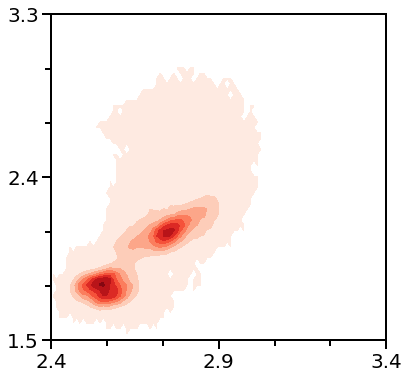

In [43]:
pl=1
curve = hbp[pl]
oname=f'bpj_ch1-{pl}'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2[pl], curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin[pl],ymax[pl])
ax.set_yticks([1.5,2.4,3.3])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_prev/{oname}.pdf', transparent=True)
plt.show()